# TP4 : Équations différentielles partielles
## PHY-3500: Physique numérique (H2021) - 2 avril 2021


Mélissa Cinq-Mars (111 179 946)

Pierre-Olivier Janvier (111 187 987)

Maxence Larose (111 188 447)

In [6]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

### L'équation de Schrödinger et la méthode de Crank-Nicolson

#### Question 1

voir exercice numéro 9.8 qui est le TP au complet dans le fond

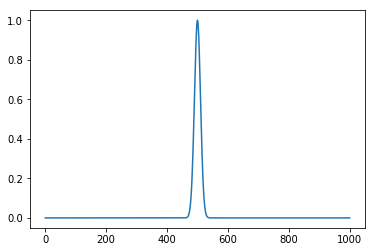

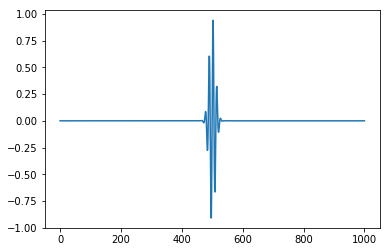

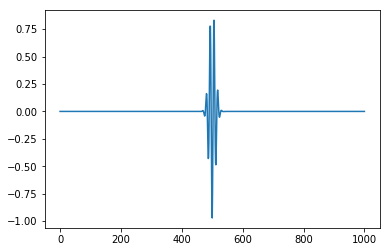

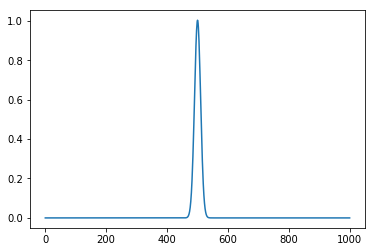

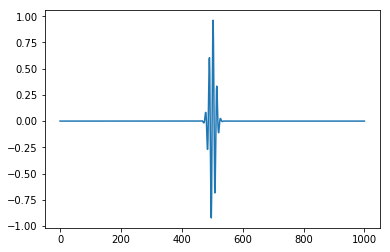

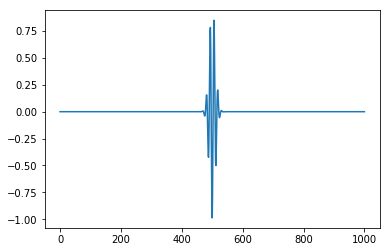

' Fin de la question 1'

In [7]:
""" Défintion des constantes """
hbar = const.hbar
m = const.electron_mass # [kg]
L = 10**-8  # [m]
h = 10**-18 # [s]
N = 1000    # [-]
a = L/N     # [m]

sigma = 1*10**-10   # [m]
k = 5*10**10        # [m^-1]

""" Coefficients des matrices symétriques et tridiagonales A et B de l'équation de Crank-Nicolson"""
a1 = 1 + h*1j*hbar / (2*m*a**2)
a2 = -h*(1j*hbar / (4*m*a**2))
b1 = 1 - h*(1j*hbar / (2*m*a**2))
b2 = h*(1j*hbar / (4*m*a**2))


"""Définition de la fonction d'onde de l'électron à t=0 """
def initial_wave_function(x, L, sigma, k):
    x0 = L/2 # [m]
    return np.exp(-((x-x0)**2)/(2*sigma**2))*np.exp(1j*k*x)


""" Définition des conditions initiales """
x = np.linspace(0, L, N+1)
psi_0 = initial_wave_function(x=x, L=L, sigma=sigma, k=k)
psi_0[[0, N]] = 0


""" On trouve le vecteur v = B*psi 
    Expression simple : vi = b1*psi_i + b2*(psi_i+1 + psi_i-1)"""
v = np.zeros(N+1, complex)

v[0] = b1*psi_0[0] + b2*psi_0[1]
v[1:N] = b1*psi_0[1:N] + b2*(psi_0[2:N+1] + psi_0[0:N-1])
v[N] = b1*psi_0[N] + b2*psi_0[N-1]


plt.plot(np.abs(psi_0))
plt.show()

plt.plot(np.real(psi_0))
plt.show()

plt.plot(np.imag(psi_0))
plt.show()

plt.plot(np.abs(v))
plt.show()

plt.plot(np.real(v))
plt.show()

plt.plot(np.imag(v))
plt.show()

""" Fin de la question 1"""

#### Question 2

In [21]:
"""La fonction suivante est issue de l'algorithme de Thomas conçu pour les matrices tridiagonales (annexe E Newman). 
La fonction banded retourne un single array de même longueur que le vecteur v du système Ax = v. 
A est un array qui contient la matrice et les variables up et down spécifient le nombre d'éléments, au dessus et
sous la diagonale, de la matrice qui ne sont pas des 0. La fonction consiste à utiliser une matrice A avec 
comme éléments de ses rangées les diagonales de la matrice tridiagonales et à effectuer une élimation gausienne. """

def banded(A_array, v_array, upper, lower):

    # La taille du système est donnée par la longueur du vecteur v 
    A = np.copy(A_array)
    v = np.copy(v_array)
    N = len(v)

    # Gaussian elimination
    for i in range(N):

        # Normalization factor
        div = A[upper, i]

        # Update the vector first
        v[i] /= div
        for k in range(1, lower+1):
            if i+k < N:
                v[i+k] -= A[upper+k, i]*v[i]

        # Now normalize the pivot row of A and subtract from lower ones
        for m in range(upper):
            j = i + upper - m
            if j<N:
                A[m,j] /= div
                for k in range(1, lower+1):
                    A[m+k, j] -= A[upper+k, i]*A[m,j]

    # Backsubstitution
    for m in range(N-2, -1, -1):
        for i in range(upper):
            j = m + upper - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

In [17]:
""" Définition de la matrice A """

# A = np.zeros((N+1,N+1), complex)

# for i in range(N):
#     A[i, i] = a1
#     A[i+1, i] = a2 
#     A[i, i+1] = a2

# A[N, N] = a1

# psi = banded(A, v, 1, 1)
# print(psi)


' Définition de la matrice A '

In [18]:
""" Définition de la matrice A avec les diagonales originales mises sur des rangées"""

A = np.zeros((N+1,N+1), complex)

A = np.empty((3, N+1),complex)

A[0,:] = a2
A[1,:] = a1
A[2:,] = a2

print(A)
psi = banded(A, v, 1, 1)
print(psi)


[[-0.-0.28941909j -0.-0.28941909j -0.-0.28941909j ... -0.-0.28941909j
  -0.-0.28941909j -0.-0.28941909j]
 [ 1.+0.57883818j  1.+0.57883818j  1.+0.57883818j ...  1.+0.57883818j
   1.+0.57883818j  1.+0.57883818j]
 [-0.-0.28941909j -0.-0.28941909j -0.-0.28941909j ... -0.-0.28941909j
  -0.-0.28941909j -0.-0.28941909j]]
[-0.00729872+0.02637606j -0.01048743+0.0396587j  -0.0077115 +0.03325761j
 ...  0.00470137+0.00130515j  0.00326938+0.000887j
  0.00167603+0.00044853j]


In [19]:
psi = psi_0
# Main loop
# store the wavefunction at each time step in a list
solution = [psi]
for i in range(2000):
    v = np.zeros(N+1, complex)
    v[0] = b1*psi[0] + b2*psi[1]
    v[1:N] = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
    v[N] = b1*psi[N] + b2*psi[N-1]
    
    psi = banded(A, v, 1, 1)
    solution.append(psi)

x_points = np.linspace(0, L, N + 1)
    
plt.plot(x_points, abs(solution[0]) ** 2)
plt.plot(x_points, abs(solution[49]) ** 2)
plt.plot(x_points, abs(solution[250]) ** 2)
plt.plot(x_points, abs(solution[500]) ** 2)
plt.plot(x_points, abs(solution[750]) ** 2)
plt.plot(x_points, abs(solution[1500]) ** 2)
plt.plot(x_points, abs(solution[2000]) ** 2)
plt.xlabel("x (m)")
plt.ylabel("$\psi(x)$")
plt.show()

C:\Users\Melissa\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square
C:\Users\Melissa\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square
C:\Users\Melissa\Anaconda3\lib\site-packages\matplotlib\ticker.py:1943: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
C:\Users\Melissa\Anaconda3\lib\site-packages\matplotlib\ticker.py:1975: RuntimeWarning: overflow encountered in double_scalars
  high = edge.ge(_vmax - best_vmin)


ValueError: arange: cannot compute length

Ci-bas, solution du livre

In [ ]:
from __future__ import division, print_function
from os import sys
sys.path.append('cpresources')
from scipy.linalg import solve_banded
from pylab import *

h = 1e-18*10
hbar = 1.0546e-36
L = 1e-8
M = 9.109e-31
N = 1000 # Grid slices

a = L/N

a1 = 1 + h*hbar/2/M/a**2*1j
a2 = -h*hbar*1j/4/M/a**2
b1 =  1 - h*hbar/2/M/a**2*1j
b2 =  h*hbar*1j/4/M/a**2

ksi = zeros(N+1,complex)

def ksi0(x):
	x0 = L/2
	sigma = 1e-10
	k = 5e10
	return exp(-(x-x0)**2/2/sigma**2)*exp(1j*k*x)

x = linspace(0,L,N+1)
ksi[:] = ksi0(x)
ksi[[0,N]]=0

A = empty((3,N),complex)

A[0,:] = a2
A[1,:] = a1
A[2:,] = a2

#==============================================================================
for i in range(100):
# v = b1*ksi[1:N] + b2*(ksi[2:N+1] + ksi[0:N-1])
# 	ksi[1:N] = banded(A,v,1,1)
#==============================================================================

#plot(ksi)

#==============================================================================
# Ap = zeros((N-1,N-1),complex)
# for i in range(N-2):
# 	Ap[i,i] = a2
# 	Ap[i+1,i] = a1 #Bottom
# 	Ap[i,i+1] = a1 #Right
# Ap[N-2,N-2] = a2
#==============================================================================

	from vpython import *

ksi_c = curve()
ksi_c.set_x(x-L/2)

#ksi = banded(A,v,1,1)
while True:
	rate(30)
	ksi_c.set_y(real(ksi)*1e-9)
	ksi_c.set_z(imag(ksi)*1e-9)	
	for i in range(20):
		v = b1*ksi[1:N] + b2*(ksi[2:N+1] + ksi[0:N-1])
		ksi[1:N] = banded(A,v,1,1)



In [ ]:
from scipy.linalg import solve_banded
from numpy import matmul, exp, linspace, array, zeros, empty
from pylab import plot, show, ylabel, xlabel

# Constants
m = 9.109 * 10 ** -31  # electron mass
L = 10 ** -8  # m
x0 = L / 2
sigma = 10 ** -10  # m
k = 5 * 10 ** 10  # 1/m
h_bar = 1.05 * 10 ** -34
N = 1000  # number of spatial slices
a = L / N  # spatial distance between points
h = 10 ** -18  # time step in seconds
a1 = 1 + 1j * h * h_bar / (2 * m * a ** 2)
a2 = - h * h_bar * 1j / (4 * m * a ** 2)
b1 = 1 - 1j * h * h_bar / (2 * m * a ** 2)
b2 = - a2


def psi_0(x):
    return exp(-(x - x0) ** 2 / (2 * sigma ** 2)) * exp(1j * k * x)


# initial conditions
x_points = linspace(0, L, N + 1)
psi = array(list(map(psi_0, x_points)), complex)
psi[0] = psi[N - 1] = 0

# Create the matrix A
# A = zeros([N + 1, N + 1], complex)
# A[0, 0] = a1
# A[0, 1] = a2
# A[N, N - 1] = a2
# A[N, N] = a1
# for i in range(N):
#     A[i, i - 1] = a2
#     A[i, i] = a1
#     A[i, i + 1] = a2
#
# # Create the matrix B
# B = zeros([N + 1, N + 1], complex)
# B[0, 0] = b1
# B[0, 1] = b2
# B[N, N - 1] = b2
# B[N, N] = b1
# for i in range(N):
#     B[i, i - 1] = b2
#     B[i, i] = b1
#     B[i, i + 1] = b2

# Create the matrix A in the form appropriate for the function solve_banded
A2 = empty([3, N + 1], complex)
A2[0, 0] = 0
A2[0, 1:] = a2
A2[1, :] = a1
A2[2, 0: N] = a2
A2[2, N] = 0

print(A2)

# Main loop
# store the wavefunction at each time step in a list
solution = [psi]
for i in range(300):
    psi[1: N] = b1 * psi[1: N] + b2 * (psi[2:] + psi[0: N - 1])
    psi = solve_banded((1, 1), A2, psi)
    solution.append(psi)

plot(x_points, abs(solution[0]) ** 2)
plot(x_points, abs(solution[49]) ** 2)
plot(x_points, abs(solution[250]) ** 2)
xlabel("x (m)")
ylabel("$\psi(x)$")
show()


#### Question 3

Créer une animation des fonctions d'onde dans le temps

#### Question 4

#### Question 5 